In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('transaction_dataset.csv')

In [3]:
data.shape

(9841, 51)

In [4]:
data

,Unnamed: 0,Index,Address,FLAG,Avg min between sent tnx,Avg min between received tnx,Time Diff between first and last (Mins),Sent tnx,Received Tnx,Number of Created Contracts,...,ERC20 min val sent,ERC20 max val sent,ERC20 avg val sent,ERC20 min val sent contract,ERC20 max val sent contract,ERC20 avg val sent contract,ERC20 uniq sent token name,ERC20 uniq rec token name,ERC20 most sent token type,ERC20_most_rec_token_type
0,0,1,0x00009277775ac7d0d59eaad8fee3d10ac6c805e8,0,844.26,1093.71,704785.63,721,89,0,...,0.000000,1.683100e+07,271779.920000,0.0,0.0,0.0,39.0,57.0,Cofoundit,Numeraire
1,1,2,0x0002b44ddb1476db43c868bd494422ee4c136fed,0,12709.07,2958.44,1218216.73,94,8,0,...,2.260809,2.260809e+00,2.260809,0.0,0.0,0.0,1.0,7.0,Livepeer Token,Livepeer Token
2,2,3,0x0002bda54cb772d040f779e88eb453cac0daa244,0,246194.54,2434.02,516729.30,2,10,0,...,0.000000,0.000000e+00,0.000000,0.0,0.0,0.0,0.0,8.0,None,XENON
3,3,4,0x00038e6ba2fd5c09aedb96697c8d7b8fa6632e5e,0,10219.60,15785.09,397555.90,25,9,0,...,100.000000,9.029231e+03,3804.076893,0.0,0.0,0.0,1.0,11.0,Raiden,XENON
4,4,5,0x00062d1dd1afb6fb02540ddad9cdebfe568e0d89,0,36.61,10707.77,382472.42,4598,20,1,...,0.000000,4.500000e+04,13726.659220,0.0,0.0,0.0,6.0,27.0,StatusNetwork,EOS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9836,9836,2175,0xff481ca14e6c16b79fc8ab299b4d2387ec8ecdd2,1,12635.10,631.39,58748.48,4,13,0,...,0.000000,0.000000e+00,0.000000,0.0,0.0,0.0,0.0,2.0,,GSENetwork
9837,9837,2176,0xff718805bb9199ebf024ab6acd333e603ad77c85,1,0.00,0.00,0.00,0,0,0,...,0.000000,0.000000e+00,0.000000,0.0,0.0,0.0,0.0,1.0,,Blockwell say NOTSAFU
9838,9838,2177,0xff8e6af02d41a576a0c82f7835535193e1a6bccc,1,2499.44,2189.29,261601.88,67,43,0,...,0.000000,0.000000e+00,0.000000,0.0,0.0,0.0,0.0,5.0,,Free BOB Tokens - BobsRepair.com
9839,9839,2178,0xffde23396d57e10abf58bd929bb1e856c7718218,1,0.00,0.00,0.00,0,1,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
data.columns

Index(['Unnamed: 0', 'Index', 'Address', 'FLAG', 'Avg min between sent tnx',
       'Avg min between received tnx',
       'Time Diff between first and last (Mins)', 'Sent tnx', 'Received Tnx',
       'Number of Created Contracts', 'Unique Received From Addresses',
       'Unique Sent To Addresses', 'min value received', 'max value received ',
       'avg val received', 'min val sent', 'max val sent', 'avg val sent',
       'min value sent to contract', 'max val sent to contract',
       'avg value sent to contract',
       'total transactions (including tnx to create contract',
       'total Ether sent', 'total ether received',
       'total ether sent contracts', 'total ether balance',
       ' Total ERC20 tnxs', ' ERC20 total Ether received',
       ' ERC20 total ether sent', ' ERC20 total Ether sent contract',
       ' ERC20 uniq sent addr', ' ERC20 uniq rec addr',
       ' ERC20 uniq sent addr.1', ' ERC20 uniq rec contract addr',
       ' ERC20 avg time between sent tnx', ' ERC20 

In [6]:
data.drop(['Unnamed: 0', 'Address', 'Index'], axis = 1, inplace = True)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9841 entries, 0 to 9840
Data columns (total 48 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   FLAG                                                  9841 non-null   int64  
 1   Avg min between sent tnx                              9841 non-null   float64
 2   Avg min between received tnx                          9841 non-null   float64
 3   Time Diff between first and last (Mins)               9841 non-null   float64
 4   Sent tnx                                              9841 non-null   int64  
 5   Received Tnx                                          9841 non-null   int64  
 6   Number of Created Contracts                           9841 non-null   int64  
 7   Unique Received From Addresses                        9841 non-null   int64  
 8   Unique Sent To Addresses                              9841

In [8]:
data.describe()

,FLAG,Avg min between sent tnx,Avg min between received tnx,Time Diff between first and last (Mins),Sent tnx,Received Tnx,Number of Created Contracts,Unique Received From Addresses,Unique Sent To Addresses,min value received,...,ERC20 max val rec,ERC20 avg val rec,ERC20 min val sent,ERC20 max val sent,ERC20 avg val sent,ERC20 min val sent contract,ERC20 max val sent contract,ERC20 avg val sent contract,ERC20 uniq sent token name,ERC20 uniq rec token name
count,9841.000000,9841.000000,9841.000000,9.841000e+03,9841.000000,9841.000000,9841.000000,9841.000000,9841.000000,9841.000000,...,9.012000e+03,9.012000e+03,9.012000e+03,9.012000e+03,9.012000e+03,9012.0,9012.0,9012.0,9012.000000,9012.000000
mean,0.221421,5086.878721,8004.851184,2.183333e+05,115.931714,163.700945,3.729702,30.360939,25.840159,43.845153,...,1.252524e+08,4.346203e+06,1.174126e+04,1.303594e+07,6.318389e+06,0.0,0.0,0.0,1.384931,4.826676
std,0.415224,21486.549974,23081.714801,3.229379e+05,757.226361,940.836550,141.445583,298.621112,263.820410,325.929139,...,1.053741e+10,2.141192e+08,1.053567e+06,1.179905e+09,5.914764e+08,0.0,0.0,0.0,6.735121,16.678607
min,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.000000,0.000000
25%,0.000000,0.000000,0.000000,3.169300e+02,1.000000,1.000000,0.000000,1.000000,1.000000,0.001000,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.000000,0.000000
50%,0.000000,17.340000,509.770000,4.663703e+04,3.000000,4.000000,0.000000,2.000000,2.000000,0.095856,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.000000,1.000000
75%,0.000000,565.470000,5480.390000,3.040710e+05,11.000000,27.000000,0.000000,5.000000,3.000000,2.000000,...,9.900000e+01,2.946467e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.000000,2.000000
max,1.000000,430287.670000,482175.490000,1.954861e+06,10000.000000,10000.000000,9995.000000,9999.000000,9287.000000,10000.000000,...,1.000000e+12,1.724181e+10,1.000000e+08,1.120000e+11,5.614756e+10,0.0,0.0,0.0,213.000000,737.000000


In [9]:
data.nunique()

FLAG                                                       2
Avg min between sent tnx                                5013
Avg min between received tnx                            6223
Time Diff between first and last (Mins)                 7810
Sent tnx                                                 641
Received Tnx                                             727
Number of Created Contracts                               20
Unique Received From Addresses                           256
Unique Sent To Addresses                                 258
min value received                                      4589
max value received                                      6302
avg val received                                        6767
min val sent                                            4719
max val sent                                            6647
avg val sent                                            5854
min value sent to contract                                 3
max val sent to contract

In [10]:
data.isnull().sum()

FLAG                                                      0
Avg min between sent tnx                                  0
Avg min between received tnx                              0
Time Diff between first and last (Mins)                   0
Sent tnx                                                  0
Received Tnx                                              0
Number of Created Contracts                               0
Unique Received From Addresses                            0
Unique Sent To Addresses                                  0
min value received                                        0
max value received                                        0
avg val received                                          0
min val sent                                              0
max val sent                                              0
avg val sent                                              0
min value sent to contract                                0
max val sent to contract                

In [11]:
corr = data.corr()
corr.style.background_gradient()

,FLAG,Avg min between sent tnx,Avg min between received tnx,Time Diff between first and last (Mins),Sent tnx,Received Tnx,Number of Created Contracts,Unique Received From Addresses,Unique Sent To Addresses,min value received,max value received,avg val received,min val sent,max val sent,avg val sent,min value sent to contract,max val sent to contract,avg value sent to contract,total transactions (including tnx to create contract,total Ether sent,total ether received,total ether sent contracts,total ether balance,Total ERC20 tnxs,ERC20 total Ether received,ERC20 total ether sent,ERC20 total Ether sent contract,ERC20 uniq sent addr,ERC20 uniq rec addr,ERC20 uniq sent addr.1,ERC20 uniq rec contract addr,ERC20 avg time between sent tnx,ERC20 avg time between rec tnx,ERC20 avg time between rec 2 tnx,ERC20 avg time between contract tnx,ERC20 min val rec,ERC20 max val rec,ERC20 avg val rec,ERC20 min val sent,ERC20 max val sent,ERC20 avg val sent,ERC20 min val sent contract,ERC20 max val sent contract,ERC20 avg val sent contract,ERC20 uniq sent token name,ERC20 uniq rec token name
FLAG,1.000000,-0.029754,-0.118533,-0.269354,-0.078006,-0.079316,-0.013711,-0.031941,-0.045584,-0.021641,-0.019259,-0.011881,0.006626,-0.022437,-0.063556,-0.007213,-0.007988,-0.008883,-0.100289,-0.014993,-0.016900,-0.007988,-0.003229,-0.025697,-0.004475,0.024762,0.013514,-0.020554,-0.017539,-0.003047,-0.018527,nan,nan,nan,nan,0.011163,-0.004313,0.007881,0.025364,0.025038,0.025044,nan,nan,nan,0.009249,-0.018047
Avg min between sent tnx,-0.029754,1.000000,0.060979,0.214722,-0.032289,-0.035735,-0.006186,-0.015912,-0.017688,-0.014886,-0.007104,-0.004382,-0.000789,-0.005716,0.003597,-0.000210,0.001044,0.000759,-0.043586,-0.006440,-0.007285,0.001044,-0.001425,-0.012307,-0.002542,-0.002105,-0.004409,-0.009477,-0.001133,-0.012754,0.045615,nan,nan,nan,nan,0.004673,-0.002456,-0.003149,-0.001687,-0.002020,-0.001965,nan,nan,nan,0.000529,0.047202
Avg min between received tnx,-0.118533,0.060979,1.000000,0.303897,-0.040419,-0.053478,-0.008378,-0.029571,-0.025747,-0.045753,-0.011575,-0.009313,-0.008761,-0.012176,-0.040011,-0.003916,-0.003230,-0.003940,-0.060711,-0.009442,-0.010720,-0.003230,-0.002149,-0.020578,-0.003656,-0.003876,-0.006160,-0.014776,-0.016037,-0.014698,-0.014932,nan,nan,nan,nan,-0.008319,-0.003544,-0.005606,-0.003758,-0.003780,-0.003727,nan,nan,nan,-0.019896,-0.014966
Time Diff between first and last (Mins),-0.269354,0.214722,0.303897,1.000000,0.154480,0.148376,-0.003881,0.037043,0.071140,-0.084996,-0.002240,-0.014002,-0.013107,0.014194,-0.046039,0.001734,0.036162,0.029440,0.189311,0.012999,0.014756,0.036162,0.002955,0.075922,0.046788,-0.005014,-0.008389,0.040686,0.080709,0.019961,0.319176,nan,nan,nan,nan,-0.010543,0.046512,0.049020,-0.006852,-0.006268,-0.006802,nan,nan,nan,0.263939,0.324288
Sent tnx,-0.078006,-0.032289,-0.040419,0.154480,1.000000,0.198455,0.320603,0.130064,0.670014,0.024015,0.102109,0.140677,-0.004846,0.225356,0.027468,0.029529,0.013263,0.020865,0.731503,0.244434,0.155811,0.013263,-0.127211,0.381311,0.006683,-0.000315,-0.002897,0.356065,0.300461,-0.008379,0.219665,nan,nan,nan,nan,-0.003868,0.004291,0.008843,-0.001557,-0.001019,-0.001415,nan,nan,nan,0.079728,0.220614
Received Tnx,-0.079316,-0.035735,-0.053478,0.148376,0.198455,1.000000,-0.003838,0.648655,0.164112,-0.022936,0.224805,-0.001786,0.093448,0.097769,0.125075,0.020645,0.008243,0.013767,0.806393,0.132150,0.235282,0.008243,0.158146,0.116203,0.016501,-0.000452,0.104870,0.044187,0.136485,0.337727,0.201686,nan,nan,nan,nan,-0.004464,0.015379,0.019126,-0.001899,-0.000744,-0.000918,nan,nan,nan,0.042681,0.202747
Number of Created Contracts,-0.013711,-0.006186,-0.008378,-0.003881,0.320603,-0.003838,1.000000,-0.002211,0.084598,-0.001542,-0.000752,-0.000498,-0.000913,0.141919,-0.001083,-0.000261,-0.000225,-0.000270,0.281428,0.024877,-0.000753,-0.000225,-0.037902,0.249500,0.002072,0.001166,-0.000374,0.154788,0.190646,-0.001083,0.028986,nan,nan,nan,nan,-0.000788,0.000920,0.002052,-0.000092,0.00014

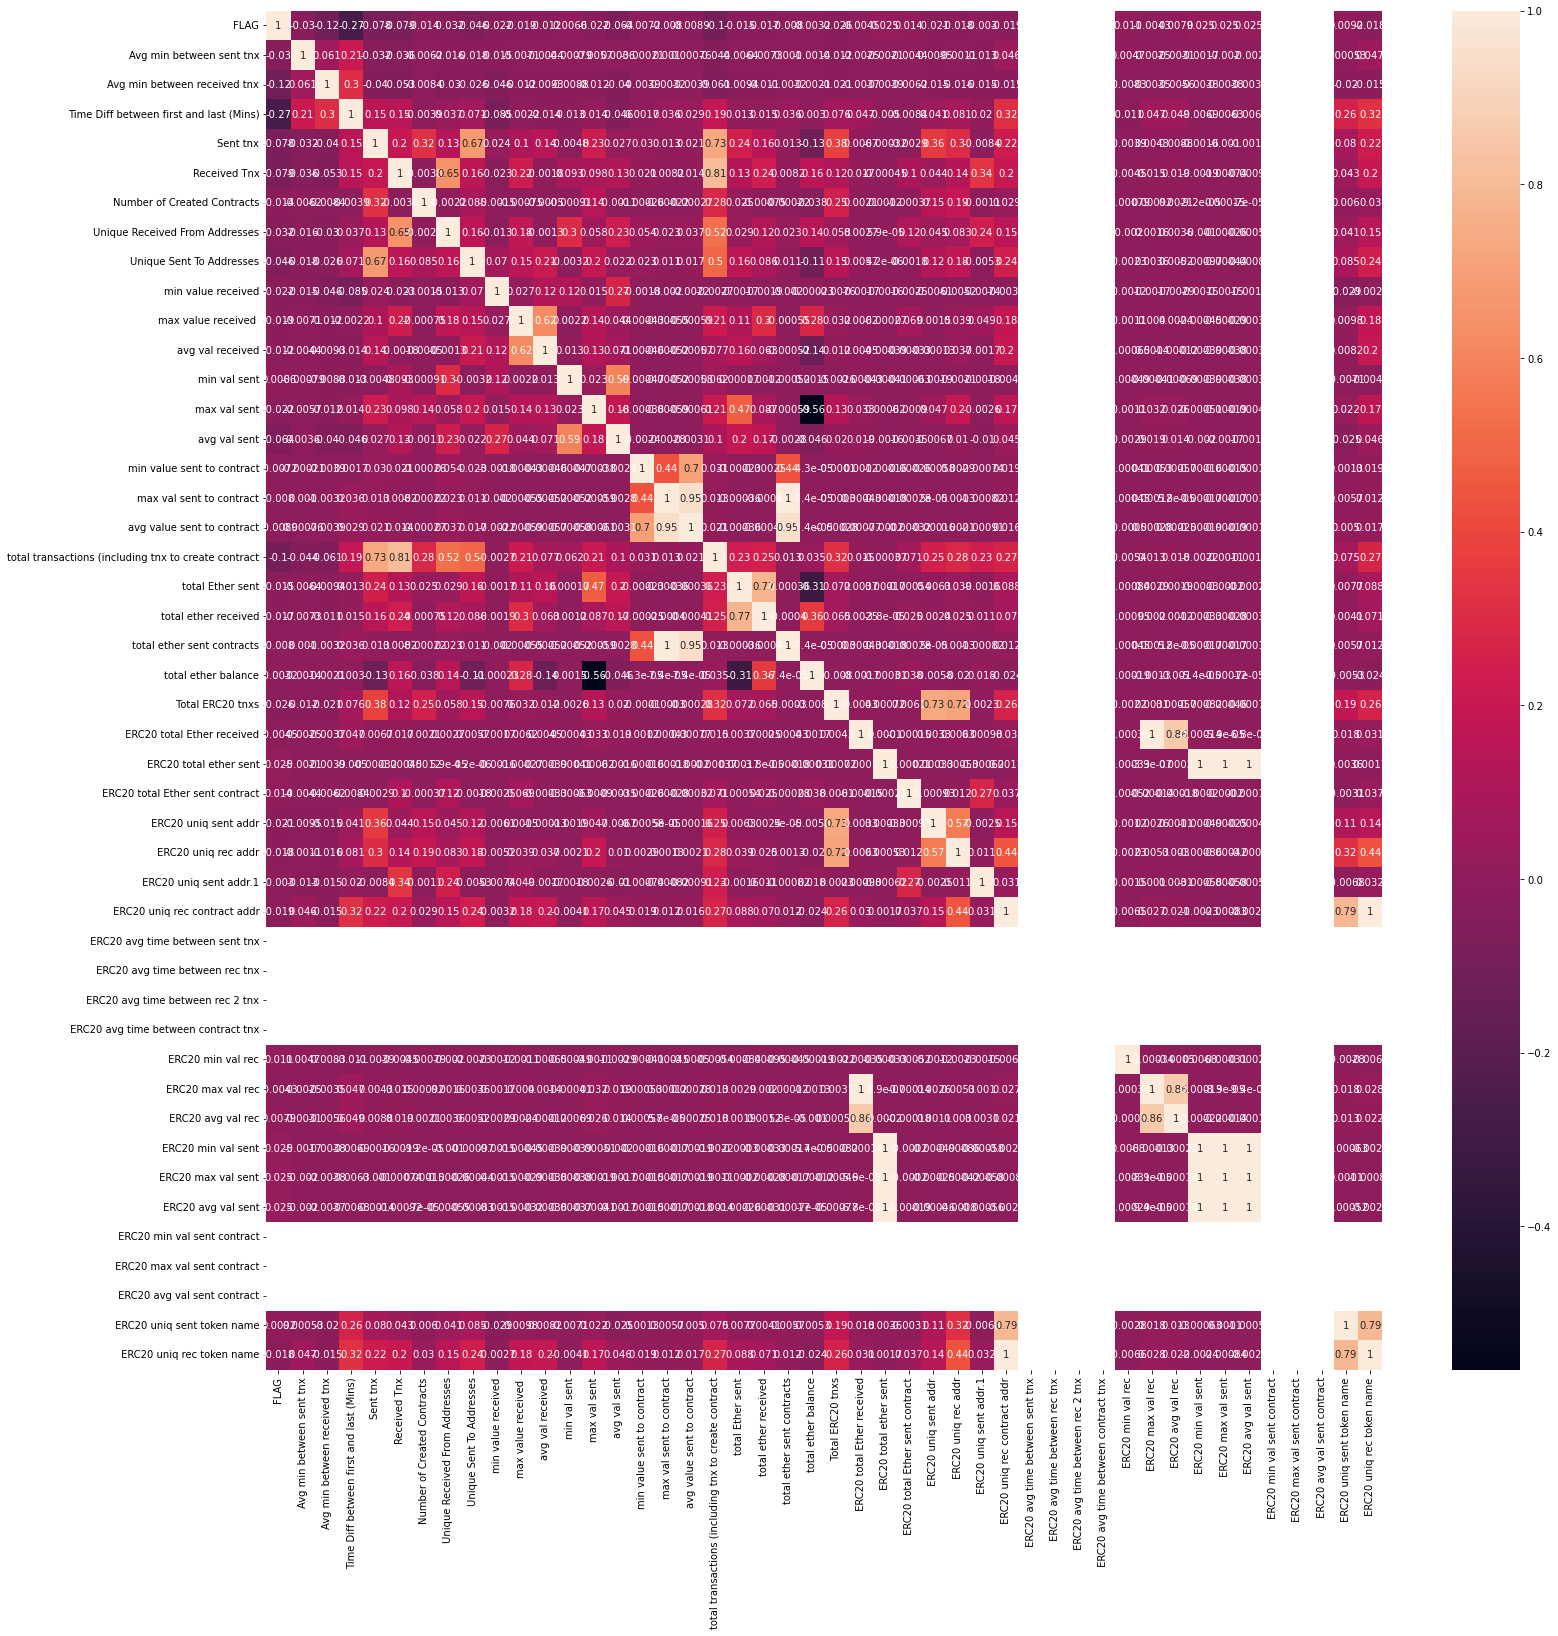

In [12]:
plt.figure(figsize=(25,25))
sns.heatmap(data.corr(), annot = True)
plt.show()

array([[<AxesSubplot:title={'center':'FLAG'}>,
        <AxesSubplot:title={'center':'Avg min between sent tnx'}>,
        <AxesSubplot:title={'center':'Avg min between received tnx'}>,
        <AxesSubplot:title={'center':'Time Diff between first and last (Mins)'}>,
        <AxesSubplot:title={'center':'Sent tnx'}>,
        <AxesSubplot:title={'center':'Received Tnx'}>,
        <AxesSubplot:title={'center':'Number of Created Contracts'}>],
       [<AxesSubplot:title={'center':'Unique Received From Addresses'}>,
        <AxesSubplot:title={'center':'Unique Sent To Addresses'}>,
        <AxesSubplot:title={'center':'min value received'}>,
        <AxesSubplot:title={'center':'max value received '}>,
        <AxesSubplot:title={'center':'avg val received'}>,
        <AxesSubplot:title={'center':'min val sent'}>,
        <AxesSubplot:title={'center':'max val sent'}>],
       [<AxesSubplot:title={'center':'avg val sent'}>,
        <AxesSubplot:title={'center':'min value sent to contract'}>,

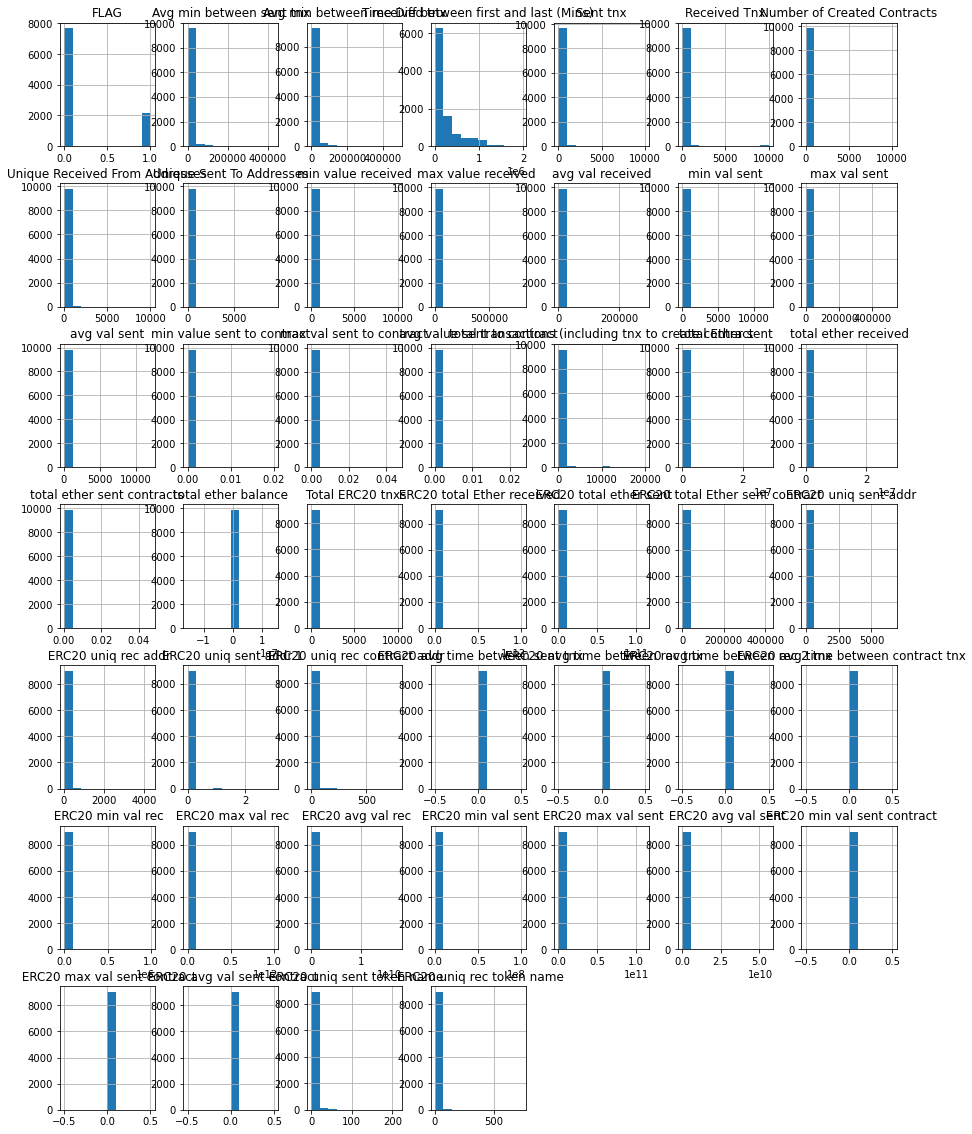

In [13]:
fig = plt.figure(figsize = (15,20))
ax = fig.gca()
data.hist(ax = ax)

In [14]:
data.skew()

FLAG                                                     1.342100
Avg min between sent tnx                                 8.420000
Avg min between received tnx                             6.745298
Time Diff between first and last (Mins)                  1.809977
Sent tnx                                                10.484544
Received Tnx                                             8.821383
Number of Created Contracts                             51.720220
Unique Received From Addresses                          18.116107
Unique Sent To Addresses                                18.354325
min value received                                      23.295883
max value received                                      46.423682
avg val received                                        96.513680
min val sent                                            73.426748
max val sent                                            59.833713
avg val sent                                            25.531087
min value 

<AxesSubplot:xlabel='FLAG', ylabel='count'>

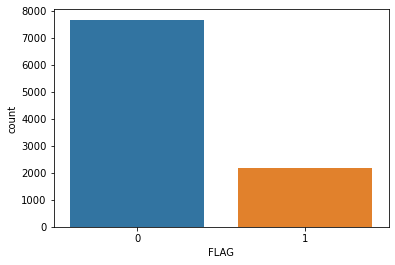

In [15]:
sns.countplot(data['FLAG'])

In [16]:
data['FLAG'].value_counts()

0    7662
1    2179
Name: FLAG, dtype: int64

In [17]:
len(data[data['FLAG'] == 0])/len(data)*100

77.85794126613149

In [18]:
len(data[data['FLAG'] == 1])/len(data)*100

22.14205873386851

In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9841 entries, 0 to 9840
Data columns (total 48 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   FLAG                                                  9841 non-null   int64  
 1   Avg min between sent tnx                              9841 non-null   float64
 2   Avg min between received tnx                          9841 non-null   float64
 3   Time Diff between first and last (Mins)               9841 non-null   float64
 4   Sent tnx                                              9841 non-null   int64  
 5   Received Tnx                                          9841 non-null   int64  
 6   Number of Created Contracts                           9841 non-null   int64  
 7   Unique Received From Addresses                        9841 non-null   int64  
 8   Unique Sent To Addresses                              9841

In [20]:
df_ = data.select_dtypes(exclude=['int', 'float'])
print(df_)

      ERC20 most sent token type         ERC20_most_rec_token_type
0                      Cofoundit                         Numeraire
1                 Livepeer Token                    Livepeer Token
2                           None                             XENON
3                         Raiden                             XENON
4                  StatusNetwork                               EOS
...                          ...                               ...
9836                                                    GSENetwork
9837                                         Blockwell say NOTSAFU
9838                              Free BOB Tokens - BobsRepair.com
9839                         NaN                               NaN
9840                                                    INS Promo1

[9841 rows x 2 columns]


In [21]:
col = data.select_dtypes(['object', 'category'])
data.drop(col, axis = 1, inplace = True)

In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9841 entries, 0 to 9840
Data columns (total 46 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   FLAG                                                  9841 non-null   int64  
 1   Avg min between sent tnx                              9841 non-null   float64
 2   Avg min between received tnx                          9841 non-null   float64
 3   Time Diff between first and last (Mins)               9841 non-null   float64
 4   Sent tnx                                              9841 non-null   int64  
 5   Received Tnx                                          9841 non-null   int64  
 6   Number of Created Contracts                           9841 non-null   int64  
 7   Unique Received From Addresses                        9841 non-null   int64  
 8   Unique Sent To Addresses                              9841

In [23]:
data[data.columns] = data[data.columns].apply(pd.to_numeric, errors='coerce')
data.fillna(data.median(), inplace = True)

In [24]:
data.isna().sum()

FLAG                                                    0
Avg min between sent tnx                                0
Avg min between received tnx                            0
Time Diff between first and last (Mins)                 0
Sent tnx                                                0
Received Tnx                                            0
Number of Created Contracts                             0
Unique Received From Addresses                          0
Unique Sent To Addresses                                0
min value received                                      0
max value received                                      0
avg val received                                        0
min val sent                                            0
max val sent                                            0
avg val sent                                            0
min value sent to contract                              0
max val sent to contract                                0
avg value sent

In [25]:
# Filtering the features with 0 variance
col = data.var()[data.var() == 0.0].index.values
col
# Drop features with 0 variance --- these features will not help in the performance of the model
data.drop(col, axis = 1, inplace = True)

In [26]:
data.var()

FLAG                                                    1.724110e-01
Avg min between sent tnx                                4.616718e+08
Avg min between received tnx                            5.327656e+08
Time Diff between first and last (Mins)                 1.042889e+11
Sent tnx                                                5.733918e+05
Received Tnx                                            8.851734e+05
Number of Created Contracts                             2.000685e+04
Unique Received From Addresses                          8.917457e+04
Unique Sent To Addresses                                6.960121e+04
min value received                                      1.062298e+05
max value received                                      1.692294e+08
avg val received                                        8.323238e+06
min val sent                                            1.921264e+04
max val sent                                            4.394646e+07
avg val sent                      

In [27]:
data.shape

(9841, 39)

In [28]:
data.describe()

,FLAG,Avg min between sent tnx,Avg min between received tnx,Time Diff between first and last (Mins),Sent tnx,Received Tnx,Number of Created Contracts,Unique Received From Addresses,Unique Sent To Addresses,min value received,...,ERC20 uniq sent addr.1,ERC20 uniq rec contract addr,ERC20 min val rec,ERC20 max val rec,ERC20 avg val rec,ERC20 min val sent,ERC20 max val sent,ERC20 avg val sent,ERC20 uniq sent token name,ERC20 uniq rec token name
count,9841.000000,9841.000000,9841.000000,9.841000e+03,9841.000000,9841.000000,9841.000000,9841.000000,9841.000000,9841.000000,...,9841.000000,9841.000000,9841.000000,9.841000e+03,9.841000e+03,9.841000e+03,9.841000e+03,9.841000e+03,9841.000000,9841.000000
mean,0.221421,5086.878721,8004.851184,2.183333e+05,115.931714,163.700945,3.729702,30.360939,25.840159,43.845153,...,0.003150,4.573214,444.706794,1.147012e+08,3.980082e+06,1.075218e+04,1.193780e+07,5.786132e+06,1.268265,4.504319
std,0.415224,21486.549974,23081.714801,3.229379e+05,757.226361,940.836550,141.445583,298.621112,263.820410,325.929139,...,0.062877,16.539647,16157.005403,1.008383e+10,2.049048e+08,1.008216e+06,1.129115e+09,5.660157e+08,6.456639,15.995935
min,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000
25%,0.000000,0.000000,0.000000,3.169300e+02,1.000000,1.000000,0.000000,1.000000,1.000000,0.001000,...,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000
50%,0.000000,17.340000,509.770000,4.663703e+04,3.000000,4.000000,0.000000,2.000000,2.000000,0.095856,...,0.000000,1.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,1.000000
75%,0.000000,565.470000,5480.390000,3.040710e+05,11.000000,27.000000,0.000000,5.000000,3.000000,2.000000,...,0.000000,2.000000,0.000000,1.900559e+01,1.337000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2.000000
max,1.000000,430287.670000,482175.490000,1.954861e+06,10000.000000,10000.000000,9995.000000,9999.000000,9287.000000,10000.000000,...,3.000000,782.000000,990000.000000,1.000000e+12,1.724181e+10,1.000000e+08,1.120000e+11,5.614756e+10,213.000000,737.000000


<AxesSubplot:>

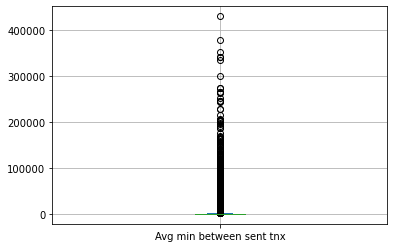

In [29]:
data['Avg min between sent tnx'].plot.box(grid = True)

<AxesSubplot:>

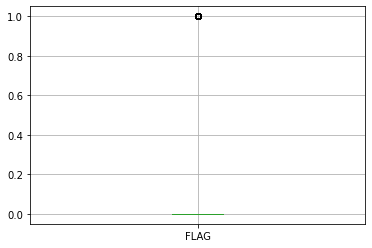

In [30]:
data['FLAG'].plot.box(grid = True)

<AxesSubplot:>

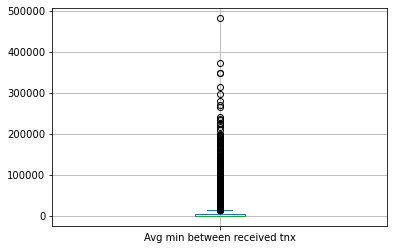

In [31]:
data['Avg min between received tnx'].plot.box(grid = True)

<AxesSubplot:>

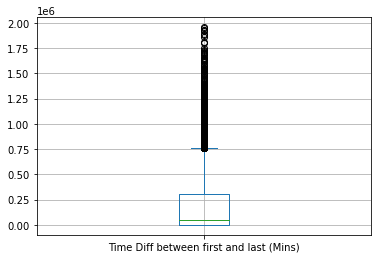

In [32]:
data['Time Diff between first and last (Mins)'].plot.box(grid = True)

<AxesSubplot:>

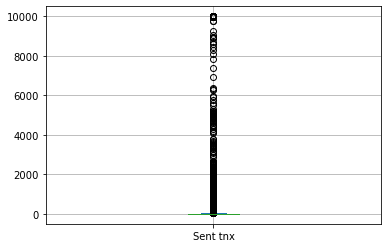

In [33]:
data['Sent tnx'].plot.box(grid = True)

<AxesSubplot:>

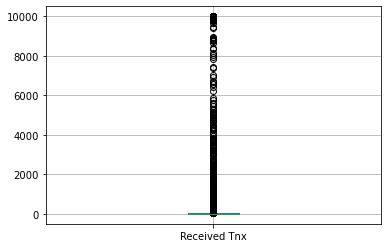

In [34]:
data['Received Tnx'].plot.box(grid = True)

<AxesSubplot:>

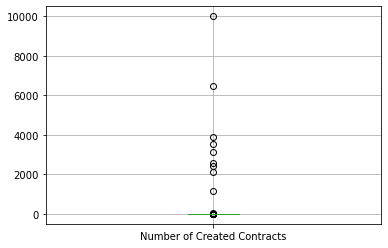

In [35]:
data['Number of Created Contracts'].plot.box(grid = True)

<AxesSubplot:>

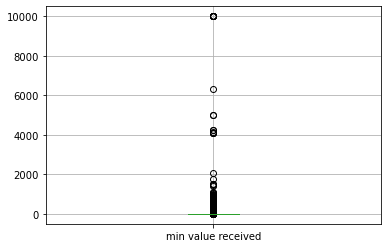

In [36]:
data['min value received'].plot.box(grid = True)

<AxesSubplot:>

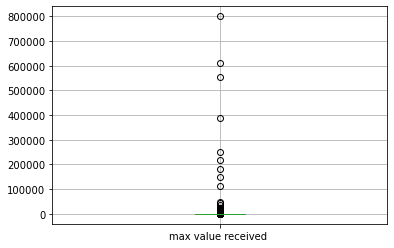

In [37]:
data['max value received '].plot.box(grid = True)

<AxesSubplot:>

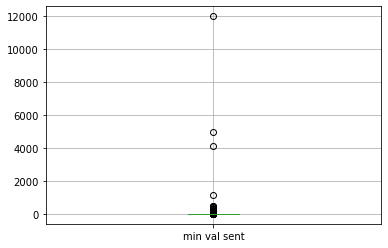

In [38]:
data['min val sent'].plot.box(grid = True)

<AxesSubplot:>

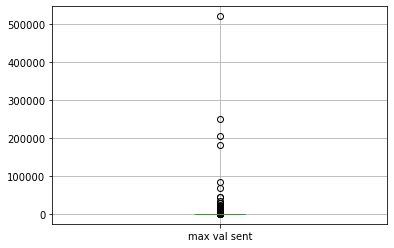

In [39]:
data['max val sent'].plot.box(grid = True)

<AxesSubplot:>

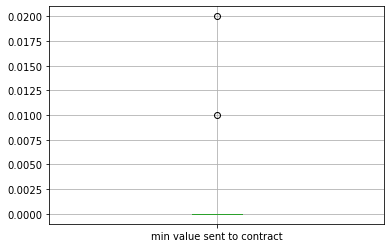

In [40]:
data['min value sent to contract'].plot.box(grid = True)

<AxesSubplot:>

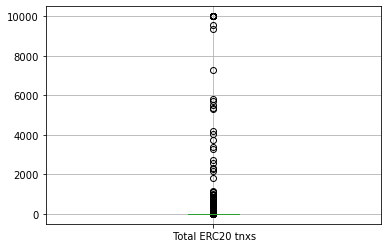

In [41]:
data[' Total ERC20 tnxs'].plot.box(grid = True)

<AxesSubplot:>

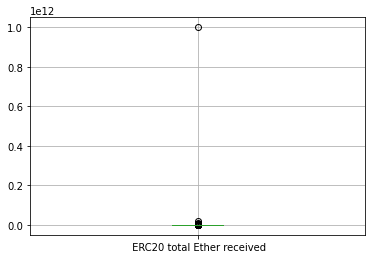

In [42]:
data[' ERC20 total Ether received'].plot.box(grid = True)

<AxesSubplot:>

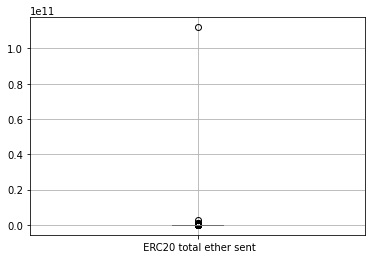

In [43]:
data[' ERC20 total ether sent'].plot.box(grid = True)

<AxesSubplot:>

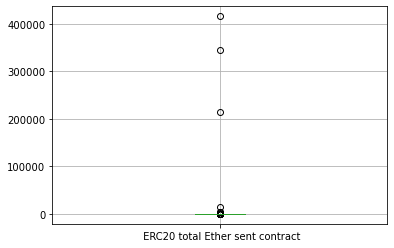

In [44]:
data[' ERC20 total Ether sent contract'].plot.box(grid = True)

<AxesSubplot:>

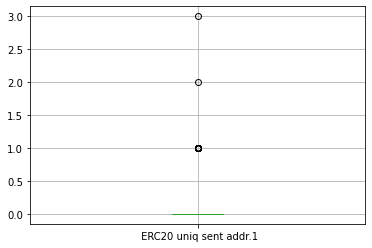

In [45]:
data[' ERC20 uniq sent addr.1'].plot.box(grid = True)

<AxesSubplot:>

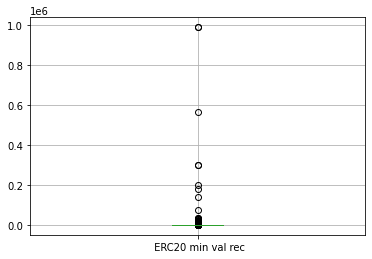

In [46]:
data[' ERC20 min val rec'].plot.box(grid = True)

0    7662
1    2179
Name: FLAG, dtype: int64


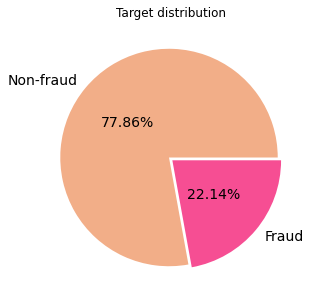

In [47]:
print(data['FLAG'].value_counts())

pie, ax = plt.subplots(figsize=[10,5])
labels = ['Non-fraud', 'Fraud']
colors = ['#f2ae88', '#f64e93']
plt.pie(x = data['FLAG'].value_counts(), autopct='%.2f%%', 
        explode=[0.02]*2, labels=labels, pctdistance=0.5, textprops={'fontsize': 14}, colors = colors)
plt.title('Target distribution')
plt.show()

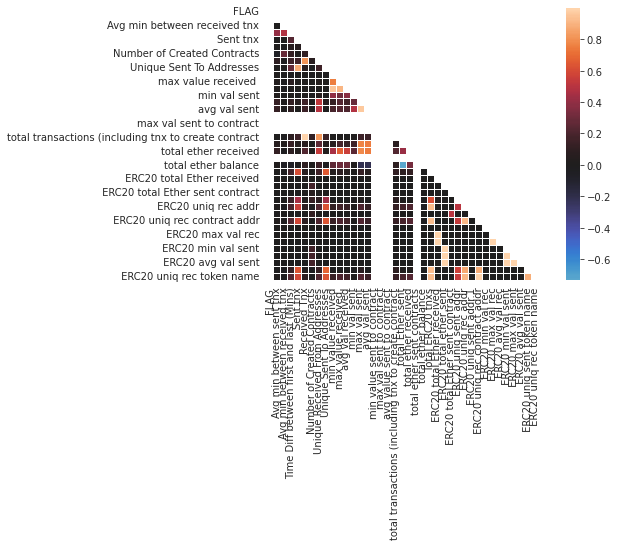

In [48]:
# Fraudulant Correlation
data_fraud = data[data['FLAG']==1]
corr = data_fraud.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)]=True
with sns.axes_style('white'):
    fig, ax = plt.subplots(figsize=(10,5))
    sns.heatmap(corr,  mask=mask, annot=False,center=0, linewidths=0.8, square=True)

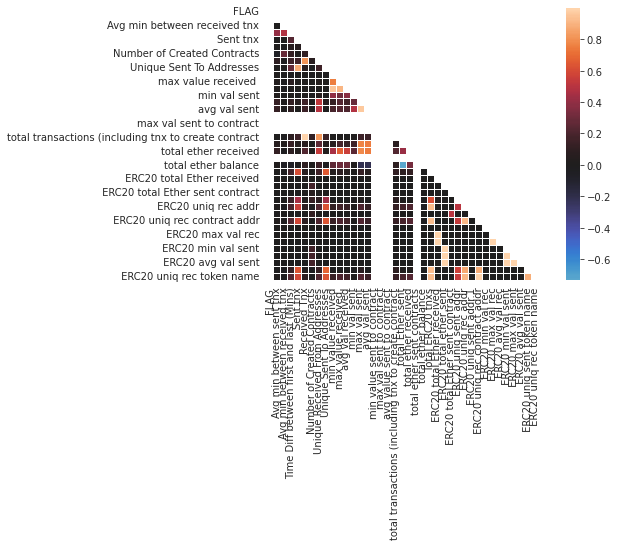

In [49]:
# Non-Fraudulant Correlation
data_not_fraud = data[data['FLAG']==0]
corr = data_fraud.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)]=True
with sns.axes_style('white'):
    fig, ax = plt.subplots(figsize=(10,5))
    sns.heatmap(corr, mask=mask, annot=False,center=0, linewidths=0.8, square=True)

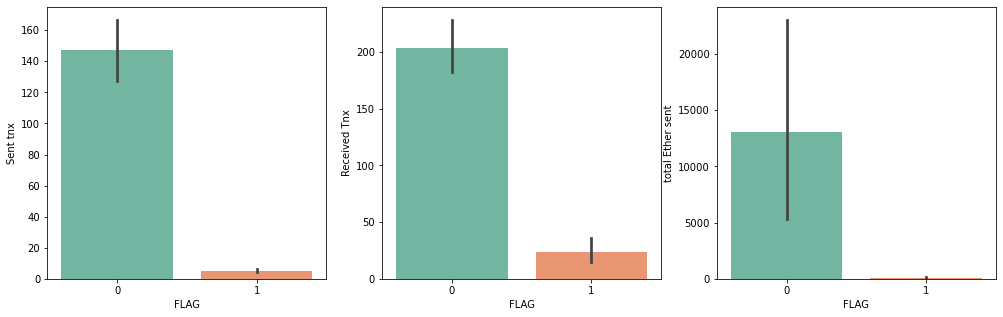

In [50]:
plt.figure(figsize=(17,5))
plt.subplot(1,3,1)
sns.barplot(y = 'Sent tnx', x='FLAG', palette='Set2', data = data)
plt.subplot(1,3,2)
sns.barplot(y = 'Received Tnx', x='FLAG', palette='Set2', data = data)
plt.subplot(1,3,3)
sns.barplot(y = 'total Ether sent', x='FLAG', palette='Set2', data = data)
plt.show()

In [51]:
data.shape

(9841, 39)

In [52]:
## Split the labels and the target
X = data.drop('FLAG', axis = 1)
y = data['FLAG']
#check the shape 
print(X.shape)
print(y.shape)

(9841, 38)
(9841,)


In [53]:

# import train test split
from sklearn.model_selection import train_test_split

In [54]:
# Split into training (80%) and testing set (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42)

# check the shape of train and test
print(X_train.shape)
print(y_train.shape)

print(X_test.shape)
print(y_test.shape)

(7872, 38)
(7872,)
(1969, 38)
(1969,)


In [55]:
X_test.head()

,Avg min between sent tnx,Avg min between received tnx,Time Diff between first and last (Mins),Sent tnx,Received Tnx,Number of Created Contracts,Unique Received From Addresses,Unique Sent To Addresses,min value received,max value received,...,ERC20 uniq sent addr.1,ERC20 uniq rec contract addr,ERC20 min val rec,ERC20 max val rec,ERC20 avg val rec,ERC20 min val sent,ERC20 max val sent,ERC20 avg val sent,ERC20 uniq sent token name,ERC20 uniq rec token name
7763,1641.74,2103.12,327679.35,10,148,0,137,4,0.001000,14.341000,...,0.0,5.0,0.00,2082.268173,419.127635,0.0,0.0,0.0,0.0,5.0
8655,2811.51,837.98,9812.92,2,5,0,4,2,0.490000,0.500000,...,0.0,1.0,13.37,13.370000,13.370000,0.0,0.0,0.0,0.0,1.0
106,157.32,0.00,314.65,2,1,0,1,2,101.000000,101.000000,...,0.0,0.0,0.00,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
439,20.17,3.92,68.37,3,2,0,2,3,12.690172,88.309828,...,0.0,0.0,0.00,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
2420,4.38,24303.06,243074.38,10,10,0,2,1,0.574000,9.000000,...,0.0,0.0,0.00,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0


In [56]:
# import pipeline
#import standaer scalar
# import simple imputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

In [57]:
# create pipeline
# 1.simple imputer
# 2. standard scalar 
pipe = Pipeline([('si', SimpleImputer()), ('sc', StandardScaler())])

In [58]:
# fit the pipline on train data
pipe.fit(X_train)

Pipeline(steps=[('si', SimpleImputer()), ('sc', StandardScaler())])

In [59]:
# import SMOTE module from imblearn library
from imblearn.over_sampling import SMOTE
# Instantiate
sm = SMOTE(random_state=42)
#fit on train data
X_train, y_train = sm.fit_resample(X_train, y_train)
# printthe shape of X_train After OverSampling
print(X_train.shape)
# printthe shape of y_train After OverSampling
print(y_train.shape)

(12240, 38)
(12240,)


In [60]:
# importing necessary libraries for geting metrics of models
from sklearn.metrics import confusion_matrix, roc_auc_score, accuracy_score, classification_report

# Function for calculating all the relevant metrics 
def cal_metrics(y_test, y_pred):
  accuracy = accuracy_score(y_test, y_pred)
  roc_auc_score = roc_auc_score(y_test, y_pred)
  cm = confusion_matrix(y_test, y_pred)
  return [accuracy, roc_auc_score, cm]

In [61]:
# Visualize importance of all the features in the dataset for the prediction

def visualize_importance(feature_importances, feat_train_df):
    feature_importance_df = pd.DataFrame()
     # creating dataframe for feature name and feature importance
    _df = pd.DataFrame()
    _df['feature_importance'] = feature_importances
    _df['column'] = feat_train_df.columns
    feature_importance_df = pd.concat([feature_importance_df, _df], 
                                      axis=0, ignore_index=True)
    # grouping all data and sorting in descending order
    order = feature_importance_df.groupby('column')\
        .sum()[['feature_importance']]\
        .sort_values('feature_importance', ascending=False).index[:50]
    # ploting feature importance data using boxenplot
    fig, ax = plt.subplots(figsize=(8, max(6, len(order) * .25)))
    sns.boxenplot(data=feature_importance_df, 
                  x='feature_importance', 
                  y='column', 
                  order=order, 
                  ax=ax, 
                  palette='viridis', 
                  orient='h')
    ax.tick_params(axis='x', rotation=0)
    ax.set_title('Importance')
    ax.grid()
    fig.tight_layout()
    # return fig, ax
    return fig, ax

Classification Report: 
              precision    recall  f1-score   support

           0       0.81      1.00      0.89      1542
           1       0.97      0.15      0.25       427

    accuracy                           0.81      1969
   macro avg       0.89      0.57      0.57      1969
weighted avg       0.84      0.81      0.75      1969

CPU times: user 818 ms, sys: 1.04 s, total: 1.85 s
Wall time: 283 ms


(<Figure size 576x684 with 1 Axes>,
 <AxesSubplot:title={'center':'Importance'}, xlabel='feature_importance', ylabel='column'>)

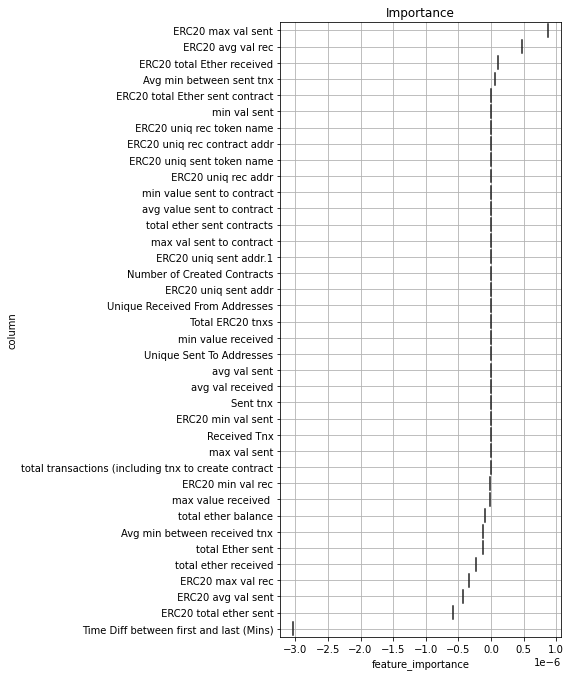

In [62]:
%%time
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train, y_train)
pred = lr.predict(X_test)
print("Classification Report: ")
print(classification_report(y_test, pred))
visualize_importance(lr.coef_[0], X_train)

Classification Report: 
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1542
           1       0.96      0.96      0.96       427

    accuracy                           0.98      1969
   macro avg       0.97      0.98      0.97      1969
weighted avg       0.98      0.98      0.98      1969

CPU times: user 1.36 s, sys: 15.9 ms, total: 1.38 s
Wall time: 1.38 s


(<Figure size 576x684 with 1 Axes>,
 <AxesSubplot:title={'center':'Importance'}, xlabel='feature_importance', ylabel='column'>)

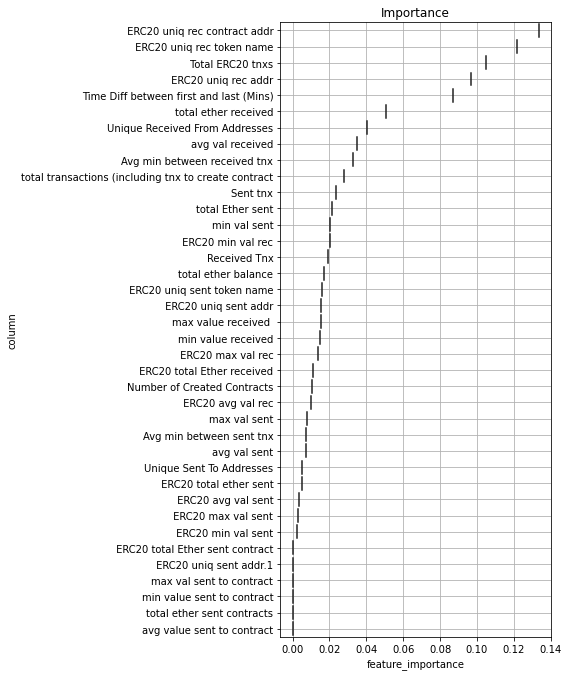

In [63]:
%%time
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
pred = rf.predict(X_test)
print("Classification Report: ")
print(classification_report(y_test, pred))
visualize_importance(rf.feature_importances_, X_train)

Classification Report: 
              precision    recall  f1-score   support

           0       0.98      0.97      0.98      1542
           1       0.89      0.94      0.91       427

    accuracy                           0.96      1969
   macro avg       0.94      0.95      0.94      1969
weighted avg       0.96      0.96      0.96      1969

CPU times: user 162 ms, sys: 5.03 ms, total: 167 ms
Wall time: 165 ms


(<Figure size 576x684 with 1 Axes>,
 <AxesSubplot:title={'center':'Importance'}, xlabel='feature_importance', ylabel='column'>)

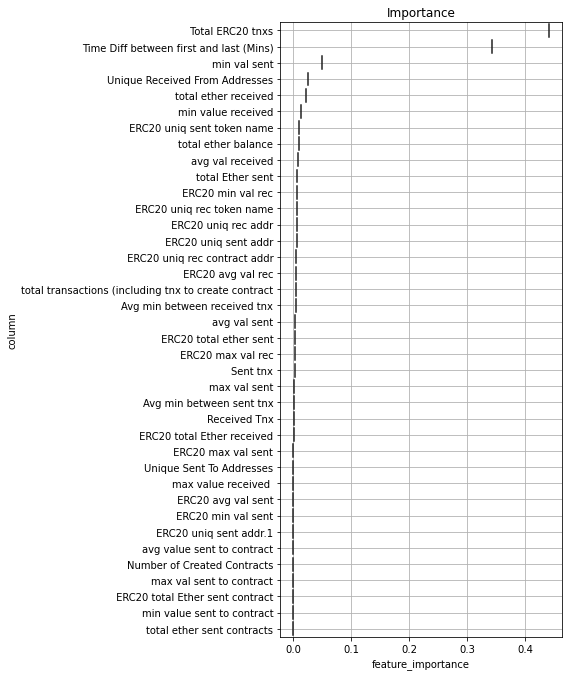

In [64]:
%%time
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()
dtree.fit(X_train, y_train)
pred = dtree.predict(X_test)
print("Classification Report: ")
print(classification_report(y_test, pred))
visualize_importance(dtree.feature_importances_, X_train)

Classification Report: 
              precision    recall  f1-score   support

           0       0.99      0.98      0.98      1542
           1       0.92      0.97      0.95       427

    accuracy                           0.98      1969
   macro avg       0.96      0.97      0.96      1969
weighted avg       0.98      0.98      0.98      1969

CPU times: user 3.87 s, sys: 20 ms, total: 3.89 s
Wall time: 3.89 s


(<Figure size 576x684 with 1 Axes>,
 <AxesSubplot:title={'center':'Importance'}, xlabel='feature_importance', ylabel='column'>)

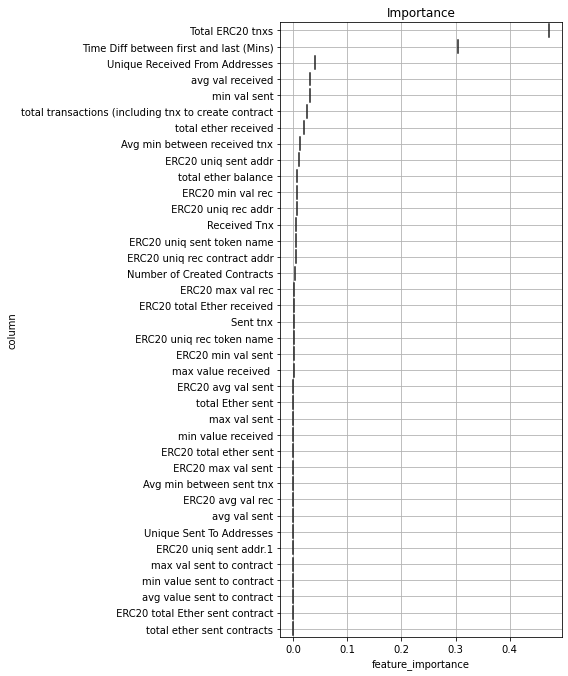

In [65]:
%%time
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier()
gb.fit(X_train, y_train)
pred = gb.predict(X_test)
print("Classification Report: ")
print(classification_report(y_test, pred))
visualize_importance(gb.feature_importances_, X_train)

(1969, 38)
Classification Report: 
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1542
           1       0.97      0.97      0.97       427

    accuracy                           0.99      1969
   macro avg       0.98      0.98      0.98      1969
weighted avg       0.99      0.99      0.99      1969



(<Figure size 576x684 with 1 Axes>,
 <AxesSubplot:title={'center':'Importance'}, xlabel='feature_importance', ylabel='column'>)

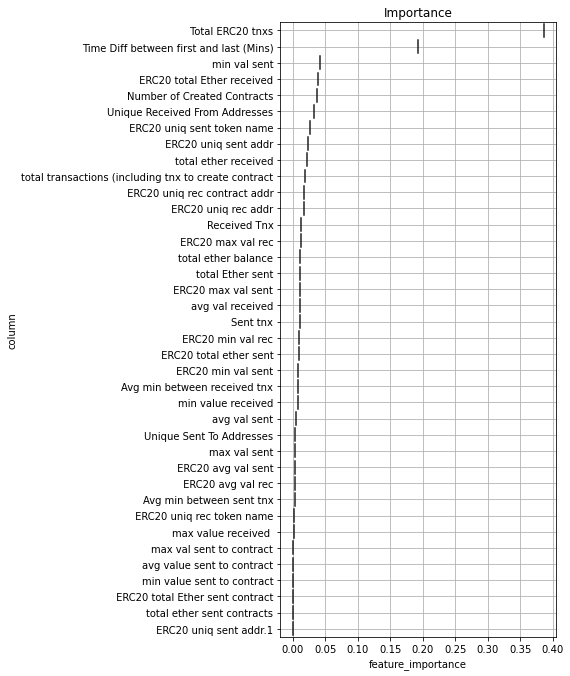

In [120]:
from xgboost import XGBClassifier
import pickle
xgb = XGBClassifier()
xgb.fit(X_train, y_train)
pred = xgb.predict(X_test)
print("Classification Report: ")
print(classification_report(y_test, pred))
visualize_importance(xgb.feature_importances_, X_train)

In [70]:
pd.DataFrame({'features':X.columns, 'Coeff':lr.coef_[0]}).sort_values(by='Coeff',ascending=False)

,features,Coeff
34,ERC20 max val sent,8.736749e-07
32,ERC20 avg val rec,4.737861e-07
23,ERC20 total Ether received,1.017370e-07
0,Avg min between sent tnx,6.086433e-08
25,ERC20 total Ether sent contract,5.724668e-09
11,min val sent,1.512517e-10
37,ERC20 uniq rec token name,6.290562e-11
29,ERC20 uniq rec contract addr,6.273949e-11
36,ERC20 uniq sent token name,2.839993e-11
27,ERC20 uniq rec addr,1.696563e-11


In [71]:
pd.DataFrame({'features':X.columns, 'importance':rf.feature_importances_}).sort_values(by='importance',ascending=False)

,features,importance
29,ERC20 uniq rec contract addr,0.133533
37,ERC20 uniq rec token name,0.121644
22,Total ERC20 tnxs,0.104726
27,ERC20 uniq rec addr,0.097044
2,Time Diff between first and last (Mins),0.087011
19,total ether received,0.050539
6,Unique Received From Addresses,0.040380
10,avg val received,0.034757
1,Avg min between received tnx,0.032500
17,total transactions (including tnx to create co...,0.028092


In [72]:
pd.DataFrame({'features':X.columns, 'importance':dtree.feature_importances_}).sort_values(by='importance',ascending=False)


,features,importance
22,Total ERC20 tnxs,0.440668
2,Time Diff between first and last (Mins),0.342282
11,min val sent,0.048967
6,Unique Received From Addresses,0.025953
19,total ether received,0.022539
8,min value received,0.013935
36,ERC20 uniq sent token name,0.010932
21,total ether balance,0.009841
10,avg val received,0.007870
18,total Ether sent,0.007532


In [73]:
pd.DataFrame({'features':X.columns, 'importance':gb.feature_importances_}).sort_values(by='importance',ascending=False)


,features,importance
22,Total ERC20 tnxs,0.472086
2,Time Diff between first and last (Mins),0.305313
6,Unique Received From Addresses,0.041108
10,avg val received,0.031928
11,min val sent,0.030381
17,total transactions (including tnx to create co...,0.025722
19,total ether received,0.019975
1,Avg min between received tnx,0.011903
26,ERC20 uniq sent addr,0.011612
21,total ether balance,0.007897


In [74]:
pd.DataFrame({'features':X.columns, 'importance':xgb.feature_importances_}).sort_values(by='importance',ascending=False)


,features,importance
22,Total ERC20 tnxs,0.386102
2,Time Diff between first and last (Mins),0.192527
11,min val sent,0.041203
23,ERC20 total Ether received,0.038374
5,Number of Created Contracts,0.036866
6,Unique Received From Addresses,0.031902
36,ERC20 uniq sent token name,0.025829
26,ERC20 uniq sent addr,0.023909
19,total ether received,0.022218
17,total transactions (including tnx to create co...,0.018629


In [75]:
from sklearn.metrics import confusion_matrix, roc_auc_score, roc_curve, auc, classification_report, plot_confusion_matrix


In [76]:
from sklearn.preprocessing import PowerTransformer

In [77]:
# Normalize the training features
norm = PowerTransformer()
norm_train_f = norm.fit_transform(X_train)

In [78]:
norm_df = pd.DataFrame(norm_train_f, columns=X_train.columns)

In [79]:
oversample = SMOTE()
print(f'Shape of the training before SMOTE: {norm_train_f.shape, y_train.shape}')

x_tr_resample, y_tr_resample = oversample.fit_resample(norm_train_f, y_train)
print(f'Shape of the training after SMOTE: {x_tr_resample.shape, y_tr_resample.shape}')

Shape of the training before SMOTE: ((12240, 38), (12240,))
Shape of the training after SMOTE: ((12240, 38), (12240,))


In [80]:
# Target distribution before SMOTE
non_fraud = 0
fraud = 0

for i in y_train:
  if i == 0:
    non_fraud +=1
  else:
    fraud +=1

# Target distribution after SMOTE
no = 0
yes = 1

for j in y_tr_resample:
  if j == 0:
    no +=1
  else:
    yes +=1


print(f'BEFORE OVERSAMPLING \n \tNon-frauds: {non_fraud} \n \tFauds: {fraud}')
print(f'AFTER OVERSAMPLING \n \tNon-frauds: {no} \n \tFauds: {yes}')

BEFORE OVERSAMPLING 
 	Non-frauds: 6120 
 	Fauds: 6120
AFTER OVERSAMPLING 
 	Non-frauds: 6120 
 	Fauds: 6121


Confusion matrix of Linear Regression: 
[[1529   13]
 [  14  413]]


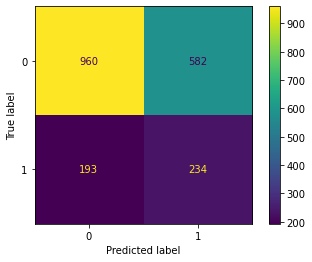

In [81]:
print("Confusion matrix of Linear Regression: ")
print(confusion_matrix(y_test, pred))
norm_test_f = norm.transform(X_test)
plot_confusion_matrix(lr, norm_test_f, y_test)

Confusion matrix of Random Forest: 
[[1529   13]
 [  14  413]]


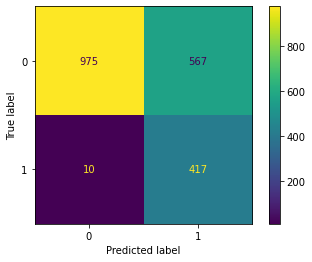

In [82]:
print("Confusion matrix of Random Forest: ")
print(confusion_matrix(y_test, pred))
plot_confusion_matrix(rf, norm_test_f, y_test)

Confusion matrix of Gradient Boosting: 
[[1529   13]
 [  14  413]]


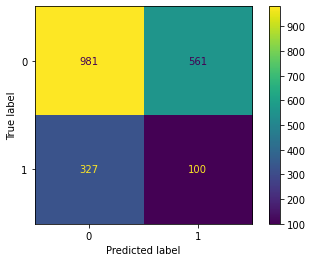

In [83]:
print("Confusion matrix of Gradient Boosting: ")
print(confusion_matrix(y_test, pred))
plot_confusion_matrix(gb, norm_test_f, y_test)

Confusion matrix of XGBoost classifier: 
[[1529   13]
 [  14  413]]


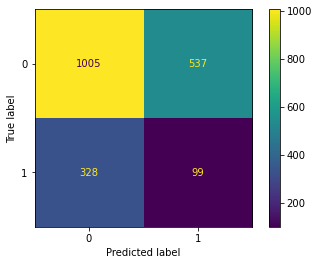

In [84]:
print("Confusion matrix of XGBoost classifier: ")
print(confusion_matrix(y_test, pred))
plot_confusion_matrix(xgb, norm_test_f, y_test)

In [85]:
from sklearn.ensemble import AdaBoostClassifier
num_trees = 50
seed=7
ada = AdaBoostClassifier(n_estimators=num_trees, random_state=seed)
ada.fit(X_train, y_train)
pred = ada.predict(X_test)
print("Classification Report: ")
print(classification_report(y_test, pred))

Classification Report: 
              precision    recall  f1-score   support

           0       0.99      0.96      0.98      1542
           1       0.88      0.96      0.92       427

    accuracy                           0.96      1969
   macro avg       0.93      0.96      0.95      1969
weighted avg       0.97      0.96      0.96      1969



(<Figure size 576x684 with 1 Axes>,
 <AxesSubplot:title={'center':'Importance'}, xlabel='feature_importance', ylabel='column'>)

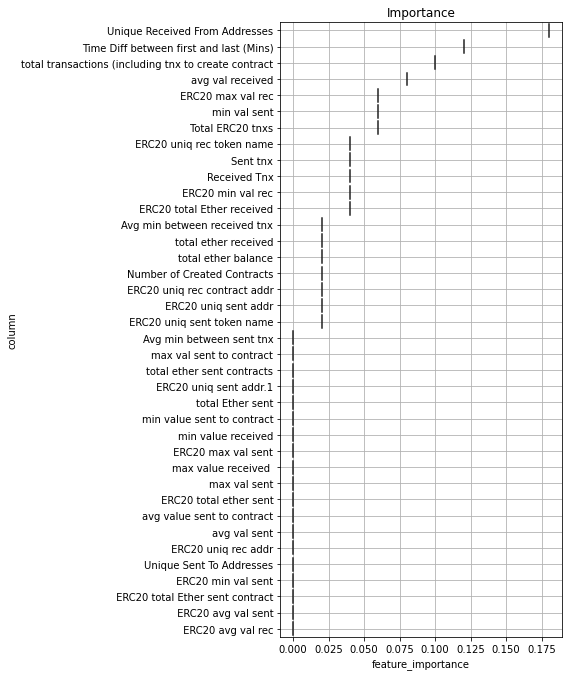

In [86]:
visualize_importance(ada.feature_importances_, X_train)

Confusion matrix for ADABoost classifier: 
[[1486   56]
 [  16  411]]


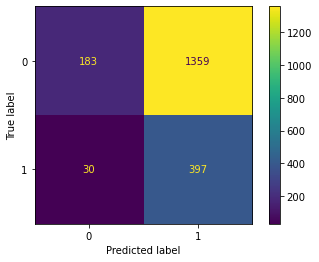

In [87]:
print("Confusion matrix for ADABoost classifier: ")
print(confusion_matrix(y_test, pred))
plot_confusion_matrix(ada, norm_test_f, y_test)

AUC: 0.572


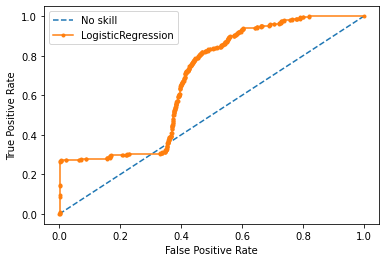

In [88]:
predictions = lr.predict(X_test)

probs = lr.predict_proba(X_test)
probs = probs[:, 1]

auc = roc_auc_score(y_test, predictions)
print("AUC: %.3f" % auc)

fpr, tpr, thresholds = roc_curve(y_test, probs)


model_name = type(lr).__name__
plt.plot([0, 1], [0, 1], linestyle='--', label="No skill")
plt.plot(fpr, tpr, marker=".", label=model_name)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()

AUC: 0.954


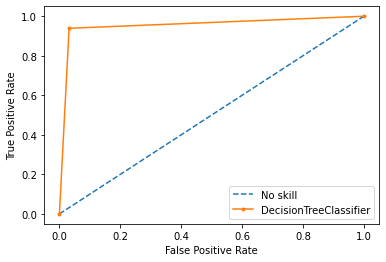

In [89]:
predictions = dtree.predict(X_test)

probs = dtree.predict_proba(X_test)
probs = probs[:, 1]

auc = roc_auc_score(y_test, predictions)
print("AUC: %.3f" % auc)

fpr, tpr, thresholds = roc_curve(y_test, probs)


model_name = type(dtree).__name__
plt.plot([0, 1], [0, 1], linestyle='--', label="No skill")
plt.plot(fpr, tpr, marker=".", label=model_name)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()

AUC: 0.975


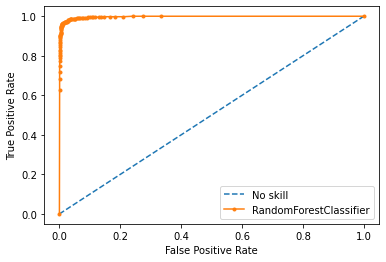

In [90]:
predictions = rf.predict(X_test)

probs = rf.predict_proba(X_test)
probs = probs[:, 1]

auc = roc_auc_score(y_test, predictions)
print("AUC: %.3f" % auc)

fpr, tpr, thresholds = roc_curve(y_test, probs)


model_name = type(rf).__name__
plt.plot([0, 1], [0, 1], linestyle='--', label="No skill")
plt.plot(fpr, tpr, marker=".", label=model_name)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()

AUC: 0.973


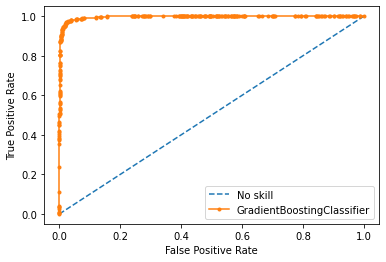

In [91]:
predictions = gb.predict(X_test)

probs = gb.predict_proba(X_test)
probs = probs[:, 1]

auc = roc_auc_score(y_test, predictions)
print("AUC: %.3f" % auc)

fpr, tpr, thresholds = roc_curve(y_test, probs)


model_name = type(gb).__name__
plt.plot([0, 1], [0, 1], linestyle='--', label="No skill")
plt.plot(fpr, tpr, marker=".", label=model_name)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()

AUC: 0.979


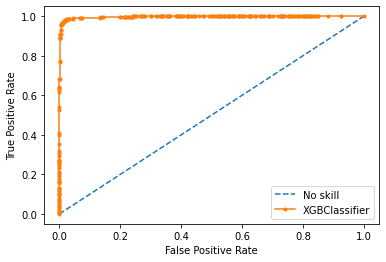

In [92]:
predictions = xgb.predict(X_test)

probs = xgb.predict_proba(X_test)
probs = probs[:, 1]

auc = roc_auc_score(y_test, predictions)
print("AUC: %.3f" % auc)

fpr, tpr, thresholds = roc_curve(y_test, probs)


model_name = type(xgb).__name__
plt.plot([0, 1], [0, 1], linestyle='--', label="No skill")
plt.plot(fpr, tpr, marker=".", label=model_name)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()

AUC: 0.963


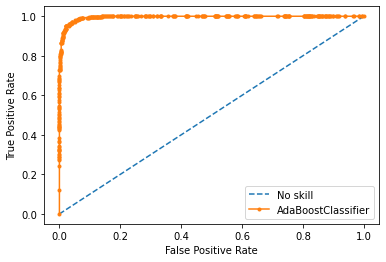

In [93]:
predictions = ada.predict(X_test)

probs = ada.predict_proba(X_test)
probs = probs[:, 1]

auc = roc_auc_score(y_test, predictions)
print("AUC: %.3f" % auc)

fpr, tpr, thresholds = roc_curve(y_test, probs)


model_name = type(ada).__name__
plt.plot([0, 1], [0, 1], linestyle='--', label="No skill")
plt.plot(fpr, tpr, marker=".", label=model_name)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()

In [94]:
def plot_features_importance(feature_importance):
    column_names = data.drop(columns='FLAG').columns

    df_feature_importance = pd.DataFrame(sorted(zip(feature_importance, column_names)),
                                       columns=['Importance value', 'Feature'])
    df_feature_importance = df_feature_importance.sort_values('Importance value', ascending=False)

    plt.figure(figsize=(9, 7)).tight_layout()
    sns.barplot(y="Feature", x="Importance value", data=df_feature_importance)
    plt.show()

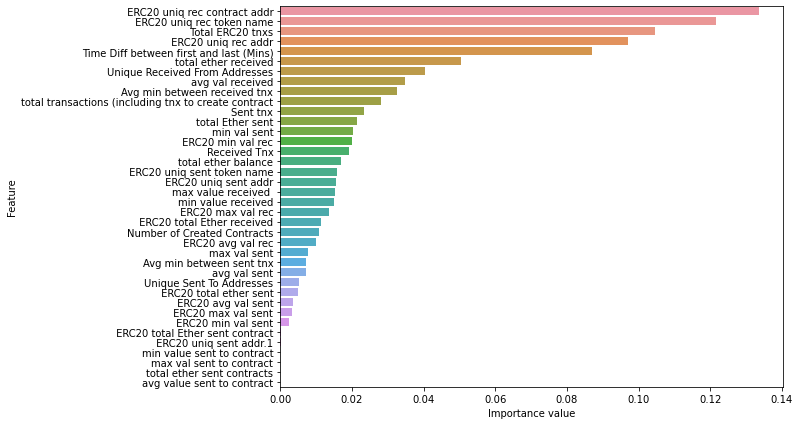

In [95]:
plot_features_importance(rf.feature_importances_)

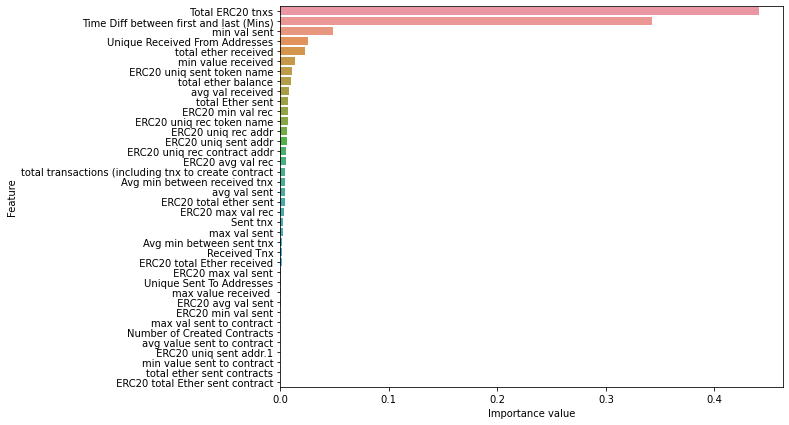

In [96]:
plot_features_importance(dtree.feature_importances_)

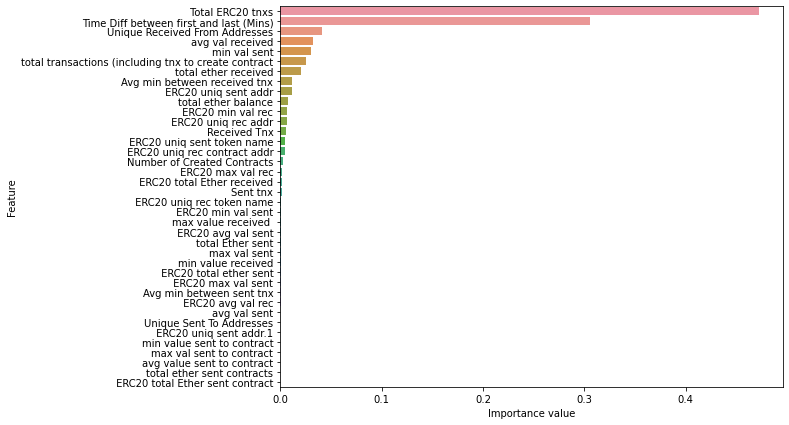

In [97]:
plot_features_importance(gb.feature_importances_)

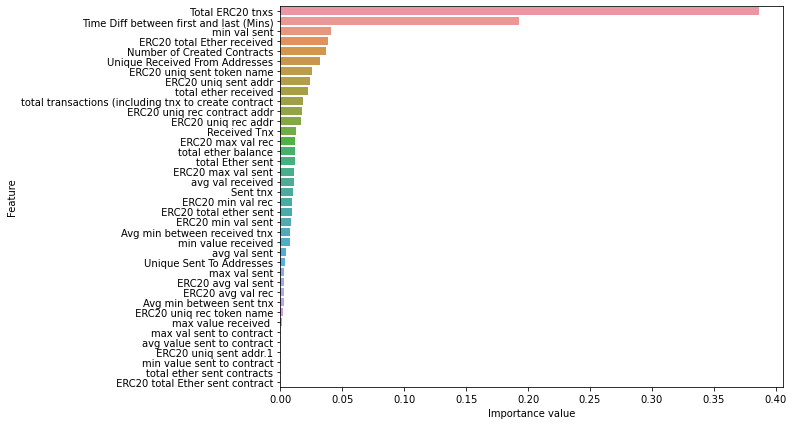

In [98]:
plot_features_importance(xgb.feature_importances_)

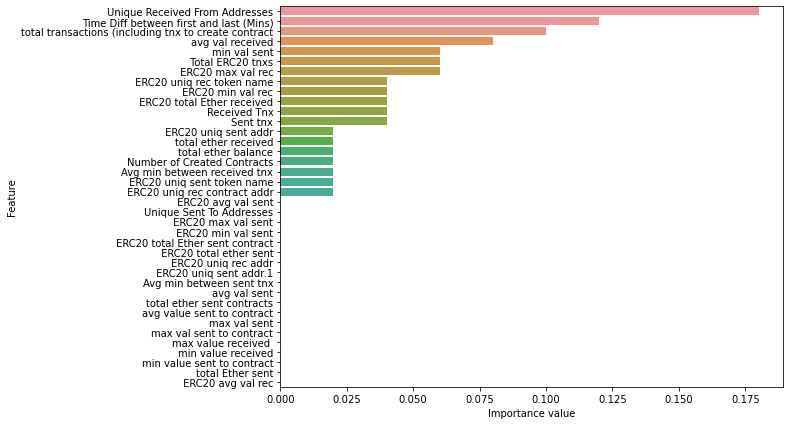

In [99]:
plot_features_importance(ada.feature_importances_)

In [100]:
from sklearn.neighbors import KNeighborsClassifier

In [101]:
knn = KNeighborsClassifier(n_neighbors=15, metric='minkowski', p= 2)
knn.fit(X_train, y_train)
pred = knn.predict(X_test)
print("Classification Report: ")
print(classification_report(y_test, pred))

Classification Report: 
              precision    recall  f1-score   support

           0       0.96      0.85      0.90      1542
           1       0.62      0.88      0.73       427

    accuracy                           0.86      1969
   macro avg       0.79      0.87      0.82      1969
weighted avg       0.89      0.86      0.86      1969



Confusion matrix of K-Nearest neighbors: 
[[1311  231]
 [  51  376]]


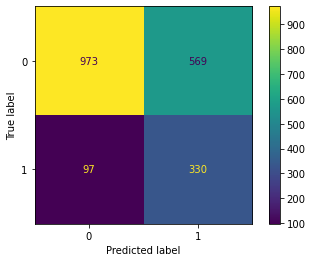

In [102]:
print("Confusion matrix of K-Nearest neighbors: ")
print(confusion_matrix(y_test, pred))
plot_confusion_matrix(knn, norm_test_f, y_test)

AUC: 0.865


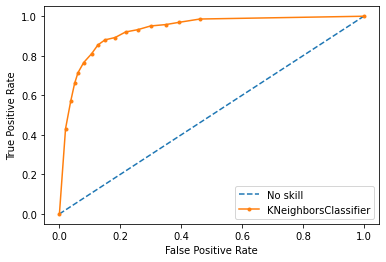

In [103]:
predictions = knn.predict(X_test)

probs = knn.predict_proba(X_test)
probs = probs[:, 1]

auc = roc_auc_score(y_test, predictions)
print("AUC: %.3f" % auc)

fpr, tpr, thresholds = roc_curve(y_test, probs)


model_name = type(knn).__name__
plt.plot([0, 1], [0, 1], linestyle='--', label="No skill")
plt.plot(fpr, tpr, marker=".", label=model_name)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()

In [104]:
from sklearn.svm import LinearSVC

In [105]:
svm = LinearSVC()
svm.fit(X_train, y_train)
pred = svm.predict(X_test)
print("Classification Report: ")
print(classification_report(y_test, pred))

Classification Report: 
              precision    recall  f1-score   support

           0       0.97      0.42      0.58      1542
           1       0.31      0.95      0.47       427

    accuracy                           0.53      1969
   macro avg       0.64      0.68      0.52      1969
weighted avg       0.83      0.53      0.56      1969



Confusion matrix of SVM: 
[[641 901]
 [ 21 406]]


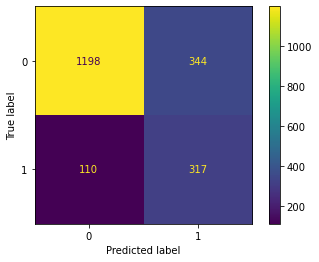

In [106]:
print("Confusion matrix of SVM: ")
print(confusion_matrix(y_test, pred))
plot_confusion_matrix(svm, norm_test_f, y_test)

AUC: 0.683


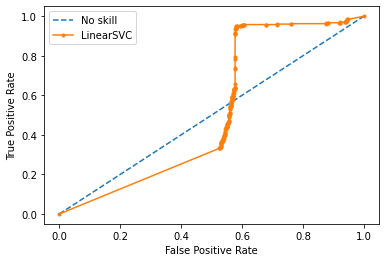

In [107]:
predictions = svm.predict(X_test)

probs = svm._predict_proba_lr(X_test)
probs = probs[:, 1]

auc = roc_auc_score(y_test, predictions)
print("AUC: %.3f" % auc)

fpr, tpr, thresholds = roc_curve(y_test, probs)


model_name = type(svm).__name__
plt.plot([0, 1], [0, 1], linestyle='--', label="No skill")
plt.plot(fpr, tpr, marker=".", label=model_name)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()

In [108]:
X_test.head()

,Avg min between sent tnx,Avg min between received tnx,Time Diff between first and last (Mins),Sent tnx,Received Tnx,Number of Created Contracts,Unique Received From Addresses,Unique Sent To Addresses,min value received,max value received,...,ERC20 uniq sent addr.1,ERC20 uniq rec contract addr,ERC20 min val rec,ERC20 max val rec,ERC20 avg val rec,ERC20 min val sent,ERC20 max val sent,ERC20 avg val sent,ERC20 uniq sent token name,ERC20 uniq rec token name
7763,1641.74,2103.12,327679.35,10,148,0,137,4,0.001000,14.341000,...,0.0,5.0,0.00,2082.268173,419.127635,0.0,0.0,0.0,0.0,5.0
8655,2811.51,837.98,9812.92,2,5,0,4,2,0.490000,0.500000,...,0.0,1.0,13.37,13.370000,13.370000,0.0,0.0,0.0,0.0,1.0
106,157.32,0.00,314.65,2,1,0,1,2,101.000000,101.000000,...,0.0,0.0,0.00,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
439,20.17,3.92,68.37,3,2,0,2,3,12.690172,88.309828,...,0.0,0.0,0.00,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
2420,4.38,24303.06,243074.38,10,10,0,2,1,0.574000,9.000000,...,0.0,0.0,0.00,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0


In [109]:
X_test.columns

Index(['Avg min between sent tnx', 'Avg min between received tnx',
       'Time Diff between first and last (Mins)', 'Sent tnx', 'Received Tnx',
       'Number of Created Contracts', 'Unique Received From Addresses',
       'Unique Sent To Addresses', 'min value received', 'max value received ',
       'avg val received', 'min val sent', 'max val sent', 'avg val sent',
       'min value sent to contract', 'max val sent to contract',
       'avg value sent to contract',
       'total transactions (including tnx to create contract',
       'total Ether sent', 'total ether received',
       'total ether sent contracts', 'total ether balance',
       ' Total ERC20 tnxs', ' ERC20 total Ether received',
       ' ERC20 total ether sent', ' ERC20 total Ether sent contract',
       ' ERC20 uniq sent addr', ' ERC20 uniq rec addr',
       ' ERC20 uniq sent addr.1', ' ERC20 uniq rec contract addr',
       ' ERC20 min val rec', ' ERC20 max val rec', ' ERC20 avg val rec',
       ' ERC20 min val sent

In [110]:
y_test

7763    1
8655    1
106     0
439     0
2420    0
       ..
1452    0
101     0
319     0
2692    0
4352    0
Name: FLAG, Length: 1969, dtype: int64

In [111]:
X_train

,Avg min between sent tnx,Avg min between received tnx,Time Diff between first and last (Mins),Sent tnx,Received Tnx,Number of Created Contracts,Unique Received From Addresses,Unique Sent To Addresses,min value received,max value received,...,ERC20 uniq sent addr.1,ERC20 uniq rec contract addr,ERC20 min val rec,ERC20 max val rec,ERC20 avg val rec,ERC20 min val sent,ERC20 max val sent,ERC20 avg val sent,ERC20 uniq sent token name,ERC20 uniq rec token name
0,6.440000,3266.120000,9817.670000,3,3,0,3,3,1.990000,2.000000,...,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0
1,17415.120000,48392.420000,931014.720000,9,16,0,7,5,0.038655,6.176138,...,0.0,2.0,0.000000,1.137182,0.379061,1.137182,1.137182,1.137182,1.0,2.0
2,29.140000,0.000000,58.280000,2,1,0,1,2,101.000000,101.000000,...,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0
3,86772.180000,0.000000,173544.370000,2,1,0,1,2,2.095936,2.095936,...,0.0,3.0,0.151820,320.782834,107.049338,0.000000,0.000000,0.000000,0.0,3.0
4,1126.460000,1277.520000,348261.820000,164,128,0,13,79,0.001170,703.019662,...,0.0,26.0,0.000000,171304.100000,8063.214941,0.000000,99999.980000,5161.600510,19.0,26.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12235,0.000000,196.158068,2779.157873,1,8,0,7,1,0.120853,3.082218,...,0.0,1.0,0.755502,0.755502,0.755502,0.000000,0.000000,0.000000,0.0,1.0
12236,0.000000,0.000000,0.000000,0,0,0,0,0,0.000000,0.000000,...,0.0,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,1.0
12237,8797.203221,283.839411,141326.446461,12,20,0,15,12,0.088252,2.525789,...,0.0,1.0,11.799347,11.799347,11.799347,0.000000,0.000000,0.000000,0.0,1.0
12238,0.000000,0.000000,0.000000,0,1,0,1,0,0.010026,0.010026,...,0.0,1.0,13.370000,13.370000,13.370000,0.000000,0.000000,0.000000,0.0,1.0


In [112]:
y_train

0        0
1        0
2        0
3        0
4        0
        ..
12235    1
12236    1
12237    1
12238    1
12239    1
Name: FLAG, Length: 12240, dtype: int64

In [113]:
import anvil.server

anvil.server.connect("TKAUARKQXVN2PXA5YFOXPOMF-74ZL46CQ7SYAD3JX")

Connecting to wss://anvil.works/uplink
Anvil websocket open
Connected to "Default environment" as SERVER


In [114]:
import pickle

In [115]:
import anvil
@anvil.server.callable
def predict(features):
    print("Hello from the uplink, %s!" % features)
#     features_list = generateFeaturesList(features)
    print([np.array(features)])
    
    ### loading pickle file model   
    loaded_model = pickle.load(open("/Users/bharadwajvishnubhotla/finalized_model.pkl",'rb'))
    score = loaded_model.predict([np.array(features_list)])
    return(score[0])
    

anvil.server.wait_forever()

KeyboardInterrupt: 